# Introduction to AMD Xilinx Vitis AI

AMD Xilinx Vitis AI is an environment (or development stack) for the whole process of embedded implementation for FPGA.

The environment consist of:
- Vitis AI Quantizer - delivers quantizer for model conversion from floating point model to quantized model.

    There is available Post Training Quantization and Quantization Aware Training.

    PTQ allows for designation of INT8 quantization parameters ow weights, biases, inputs and features maps.

    For quantization is used small part of training dataset.

    Vitis AI supports popular frameworks like PyTorch, TensorFlow or Caffe.
    
- Vitis AI Optiomizer - delivers tools for network optimization f.g. pruning.

- Vitis AI Compiler - compiles quantized model into representation understandable by accelerator.

- Vitis AI RunTime (VART) - driver library for communication with accelerator.

- Vitis AI Deep learning Processor Unit (DPU) - sequential / general purpose 
    
    accelerator implemented in reconfigurable logic - FPGA.
    
    DPU allows for execution of 
    
    - Convolution 1-3D: standard, depthwise, transposed
    - upsampling: bilinear, nearest neighbor
    - max / average pooling
    - elementwise addition and multiplication
    - activations: ReLU, ReLU6, LeakyReLU, softmax
    - for some HW platforms available also sigmoid and hyperbolic tangent.
    
    DPU is generated by appropriate software (Vitis HLS / Vivado).
    Generation time allows for final DPU configuration changes:
    - available operations (depthwise, elementwise mul., LeakyReLU, softmax, average pooling).
    - resources usage: DSP, dRAM
    - energy saving mode

This laboratory is dedicated to the part related to quantization and compilation of PyTorch NN model with Vitis AI. 

## Part 1 - FLOATING-POINT TRAINING

1. Instantiate evaluation (batch size = 1) loader with test data.

Instantiate MiniResNet model.

Print number of model parameters.

Use functions from `local_utils` module. 

In [2]:
import torch
import matplotlib.pyplot as plt
import local_utils

eval_loader = ... 
print("len(eval_loader) =", len(eval_loader))

net = ...

len(eval_loader) = 10000
Num of parameter: 289006


2. Instantiate train and test loaders with batch size = 64.

Use functions from `local_utils`

In [3]:
BATCH_SIZE = 64

train_loader = ...
test_loader = ...

print("len(train_loader) =", len(train_loader))
print("len(test_loader) =", len(test_loader))

loader = train_loader
for X, y in loader:
    print(X.shape)
    print(y.shape)
    break

len(train_loader) = 938
len(test_loader) = 157
torch.Size([64, 1, 28, 28])
torch.Size([64])


<Figure size 432x288 with 0 Axes>

3. Train the network with:
- SGD optimizer
- learning rate 0.1
- update period of 5
- 5 epochs
- accuracy metric

Plot history.

cuda
Epoch 1 / 5: STARTED
TRAINING
Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


938it [00:52, 17.83it/s]


VALIDATION
Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


157it [00:03, 51.55it/s]


After epoch 1: loss=1.6978 acc=0.7632 val_loss=1.5001 val_acc=0.9617
Epoch 1 / 5: FINISHED

Epoch 2 / 5: STARTED
TRAINING
Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


938it [00:54, 17.12it/s]


VALIDATION
Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


157it [00:03, 40.89it/s]


After epoch 2: loss=1.4964 acc=0.9657 val_loss=1.5105 val_acc=0.9527
Epoch 2 / 5: FINISHED

Epoch 3 / 5: STARTED
TRAINING
Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


938it [01:00, 15.58it/s]


VALIDATION
Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


157it [00:03, 40.29it/s]


After epoch 3: loss=1.4859 acc=0.9760 val_loss=1.4775 val_acc=0.9839
Epoch 3 / 5: FINISHED

Epoch 4 / 5: STARTED
TRAINING
Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


938it [00:59, 15.73it/s]


VALIDATION
Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


157it [00:03, 40.94it/s]


After epoch 4: loss=1.4793 acc=0.9827 val_loss=1.4770 val_acc=0.9844
Epoch 4 / 5: FINISHED

Epoch 5 / 5: STARTED
TRAINING
Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


938it [01:00, 15.57it/s]


VALIDATION
Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


157it [00:03, 41.02it/s]


After epoch 5: loss=1.4766 acc=0.9849 val_loss=1.4782 val_acc=0.9833
Epoch 5 / 5: FINISHED



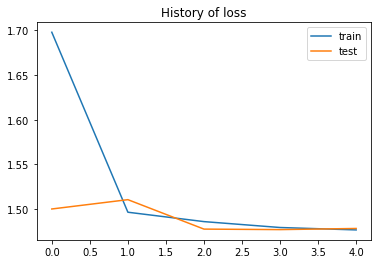

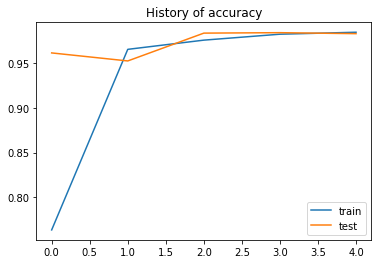

In [4]:
metric = ...
criterion = ...
optimizer = ...

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

net.to(device)
net, history = local_utils.training(
                                    ...,
                                    device=device)


4. Extract model state dict and save it in file `weights.pth`.

Note: `_use_new_zipfile_serialization=False` is needed for backward compatibility.
with older version of PyTorch in Vitis AI docker environment.

In [5]:
...

## Part 2 - EVALUATION - host device

5. Instantiate `MiniResNet` network with the same input shape.

Load state dict from `weights.pth` file and initialize with them network (`load_state_dict`, with `map_location=device`).  

Evaluate model on `eval_loader` dataset with `local_utils.train_test_pass`.

Print information about loss, accuracy, time of execution, number of processed images and throughput (fps).

Experiment do for 'cpu' and for 'cuda' devices.

In [6]:
# CUDA - GPU
...

tm = local_utils.TimeMeasurement("Host-GPU", len(eval_loader))
with tm:
    net, loss, acc = ...

print(repr(tm))
print("loss:", loss)
print("acc:", acc)

Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


10000it [00:29, 337.91it/s]

TimeMeasurement(context="Host-GPU","0.0:0.0:29.0:596.0", frames=10000, throughput=337.8769658086124)
loss: 1.4782457392215729
acc: 0.9833


In [7]:
# CPU
...

tm = local_utils.TimeMeasurement("Host-CPU", len(eval_loader))
with tm:
    net, loss, acc = ...

print(repr(tm))
print("loss:", loss)
print("acc:", acc)

Running on platform: Linux-5.15.0-56-generic-x86_64-with-glibc2.29, machine: x86_64, python_version: 3.8.10, processor: x86_64, system: Linux, 


10000it [00:18, 534.00it/s]

TimeMeasurement(context="Host-CPU","0.0:0.0:18.0:729.0", frames=10000, throughput=533.9176316203789)
loss: 1.4782456042170524
acc: 0.9833


# Part 3 - AMD Xilinx Vitis AI environment

This part is a guid how to run AMD Xilinx Vitis AI (Vitis AI / VAI as shortcuts):

1. Open console in directory with `lab_11` files 

(or create new cell and write commands with `!` at the beginning of line f.g. `!ls`).

2. Run docker container (preceded by some Xilinx consents of VAI usage) by running a script:

`sudo bash ./docker_run.sh xilinx/vitis-ai:1.4.916`

Mentioned script pulls (if it's necessary) the docker image of Vitis AI environment with version 1.4.916

and starts bash terminal.

This operation may take some time...

3. Now your terminal is placed in VAI container.

Current directory in container (`/workspace`) is mapped to directory where you run a VAI container
(`lab_11` directory).

4. Activate VAI conda environment dedicated for PyTorch library;

`conda activate vitis-ai-pytorch`

5. Run Jupyter server inside container.

`jupyter notebook --no-browser --ip=0.0.0.0 --NotebookApp.token='' --NotebookApp.password=''`
 
6. Save this file.

7. Open link to Jupyter's browser interface and run `notebook_quntize.ipynb`.